## Mask

In [1]:
import numpy as np
from jaqs.data import DataView
from jaqs.research import SignalDigger
import warnings

warnings.filterwarnings("ignore")
dataview_folder = 'stockdata/hs300'
dv = DataView()
dv.load_dataview(dataview_folder)

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataview loaded successfully.


In [8]:
mask = dv.get_ts('mask_index_member')
can_enter = dv.get_ts('can_enter')
can_exit = dv.get_ts('can_exit')

## Event

In [63]:
dv.remove_field('new_high')
dv.remove_field('new_high_delay')
dv.remove_field('sig')

In [64]:
def add_event():
    dv.add_formula('new_high', 'close_adj >= Ts_Max(high, 10)', is_quarterly=False)
    dv.add_formula('new_high_delay', 'Delay(Ts_Max(new_high, 20),1)', is_quarterly=False)
    dv.add_formula('sig', 'new_high && (!new_high_delay)', is_quarterly=False)
add_event()

In [65]:
import matplotlib.pyplot as plt

def cal_obj(signal, name, period):
    price = dv.get_ts('close_adj')
    price_bench = dv.data_benchmark

    # Step.4 analyze!
    obj = SignalDigger(output_folder="zz500/%s" % name,
                       output_format='pdf')
    
    df_all, df_events, df_stats = obj.create_binary_event_report(signal, price, mask, can_enter, can_exit, price_bench, periods=[period,period*2, period*3])
    print(df_stats)
    return obj
    
def plot_pfm(signal, name, period=5):
    obj = cal_obj(signal, name, period)
    obj.fig_objs
    plt.show()
    
def signal_data(signal, name, period=5):
    obj = cal_obj(signal, name, period)
    return obj.signal_data

In [73]:
signal = dv.get_ts('sig')

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%

       Calendar Distribution    (3867 occurance from 2012-01-04 to 2017-12-22):
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\high_sig\event_report.pdf
                   Annu. Ret.  Annu. Vol.    t-stat  p-value  skewness  \
trade_date Period                                                        
all_sample 7        -0.020233    0.310774 -0.501584  0.61601  1.073240   
           14        0.024039    0.308894  0.847910  0.39659  0.737140   
           21        0.008900    0.312332  0.380263  0.70379  0.982962   

                   kurtosis  occurance  Annu. Ret. (all samp)  \
trade_date Period                                               
all_sample 7       4.963487       2052              -0.000469   
           14      3.193901

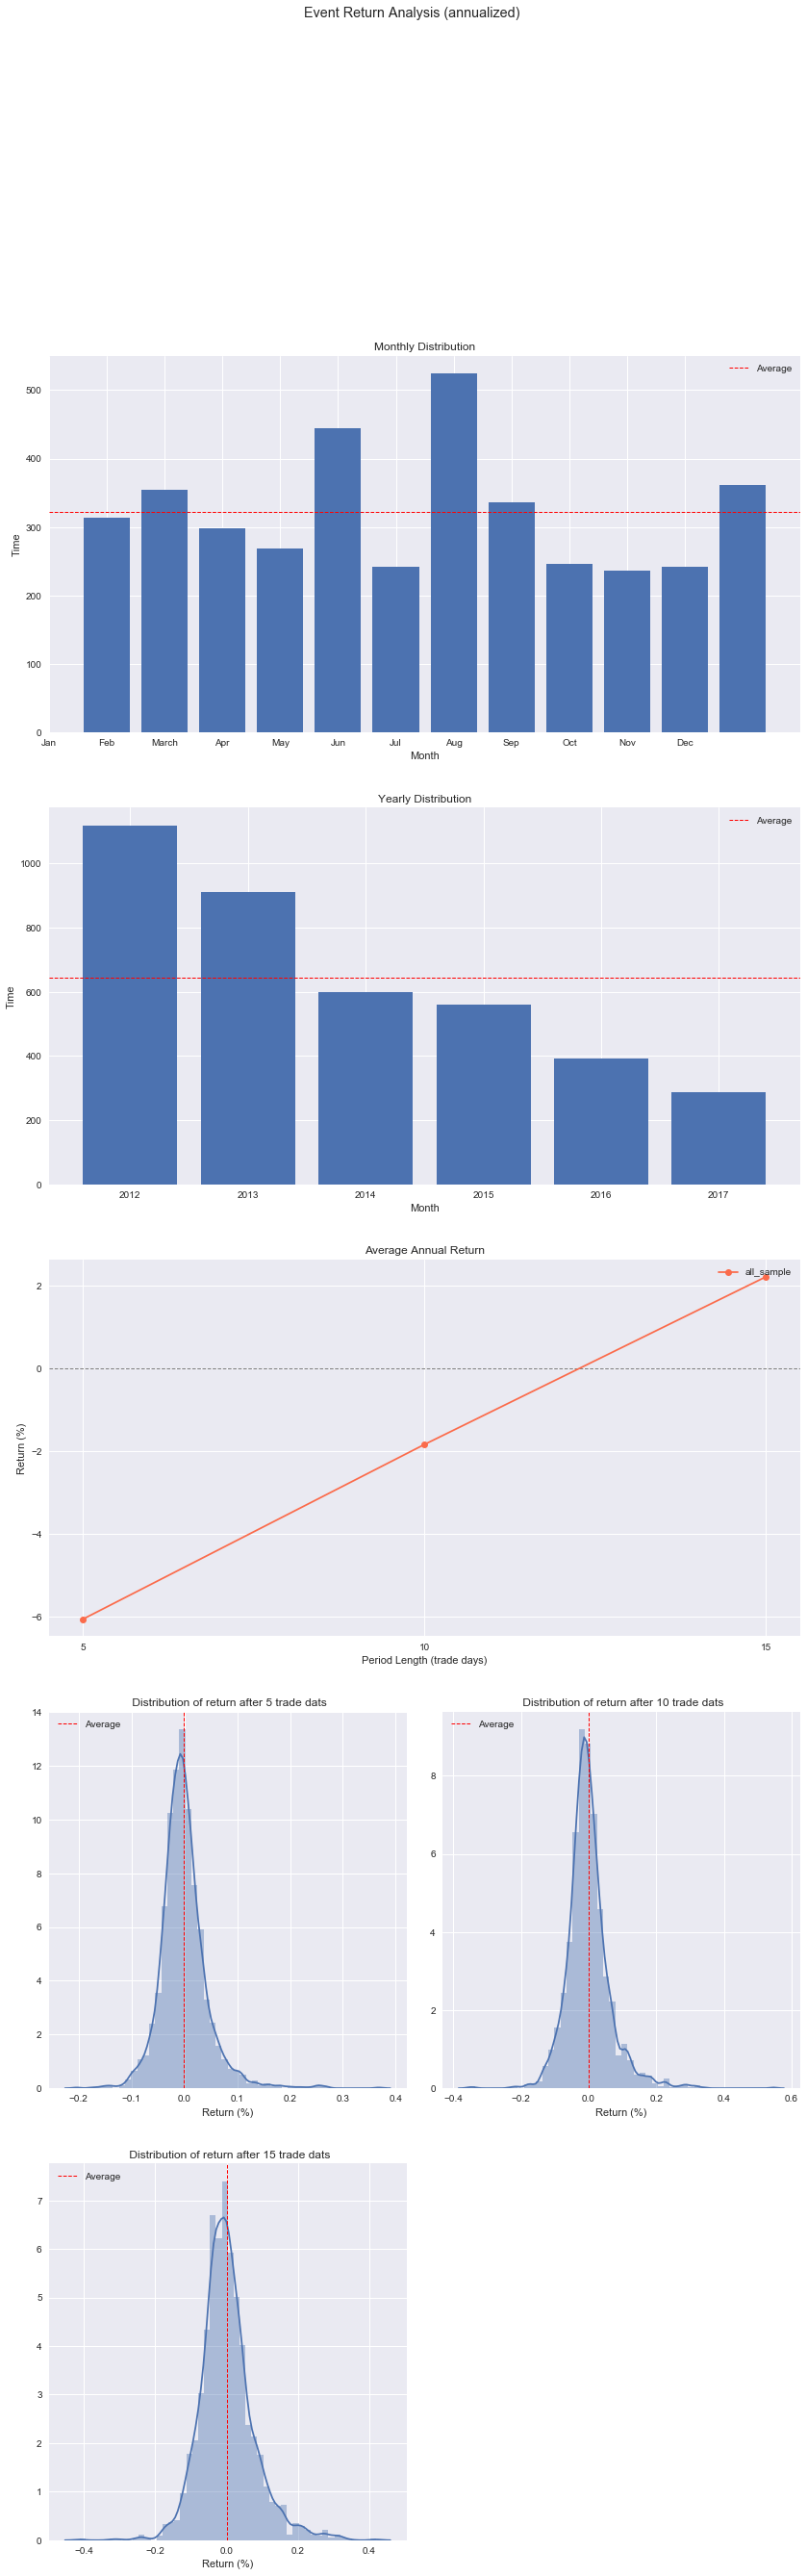

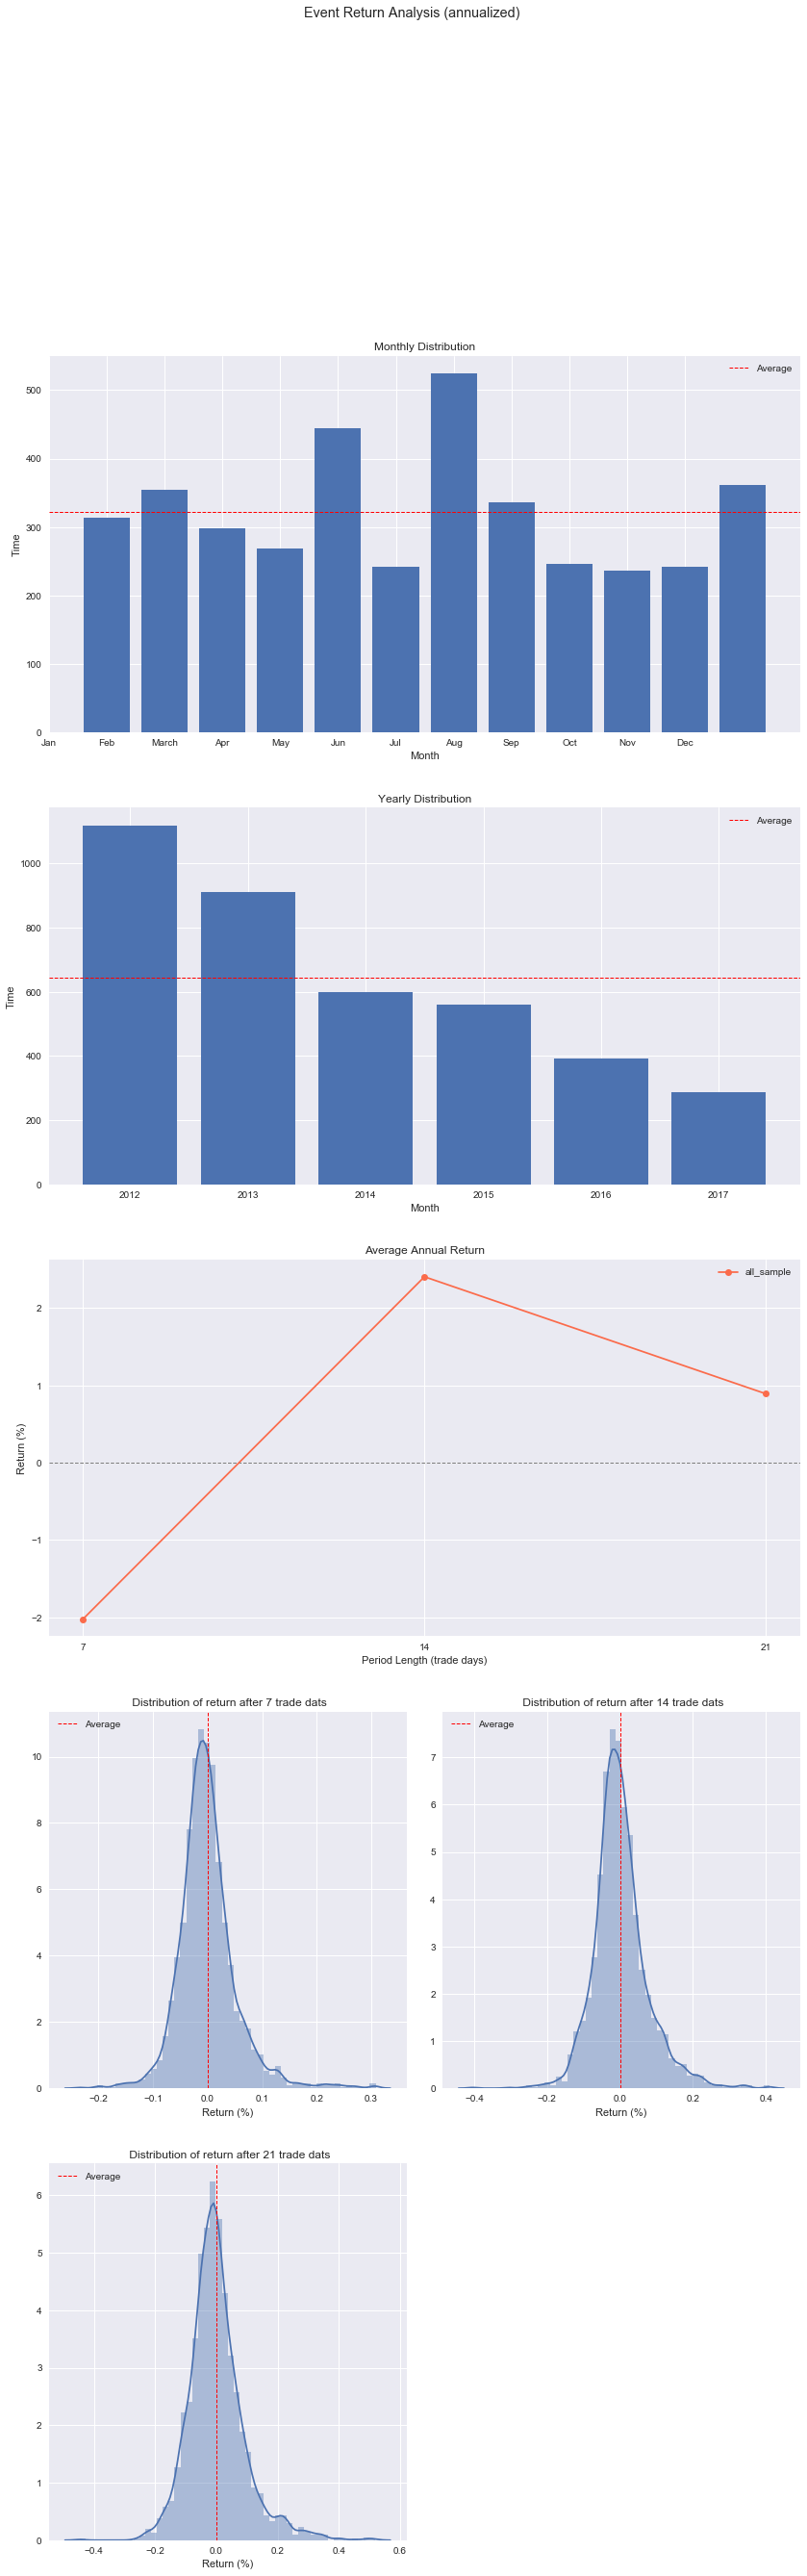

In [76]:
plot_pfm(signal,'high_sig', period=7)

In [77]:
signal_df = signal_data(signal, 'high_sig', period=7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%

       Calendar Distribution    (3867 occurance from 2012-01-04 to 2017-12-22):
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\high_sig\event_report.pdf
                   Annu. Ret.  Annu. Vol.    t-stat  p-value  skewness  \
trade_date Period                                                        
all_sample 7        -0.020233    0.310774 -0.501584  0.61601  1.073240   
           14        0.024039    0.308894  0.847910  0.39659  0.737140   
           21        0.008900    0.312332  0.380263  0.70379  0.982962   

                   kurtosis  occurance  Annu. Ret. (all samp)  \
trade_date Period                                               
all_sample 7       4.963487       2052              -0.000469   
           14      3.193901

In [78]:
event_df = signal_df.signal[signal_df.signal==1].unstack()

In [79]:
from datetime import timedelta
import pandas as pd

def Convert(stock):
    stock_df = stock
    stock_df.index = list(map(lambda T: T+timedelta(hours=15) , pd.to_datetime(stock_df.index, format="%Y%m%d")))
    new_names = {}
    for c in stock_df.columns:
        if c.endswith('SZ'):
            new_names[c] = c.replace('SZ', 'XSHE')
        elif c.endswith('SH'):
            new_names[c] = c.replace('SH', 'XSHG')
    stock_df = stock_df.rename_axis(new_names, axis=1)
    return stock_df

In [80]:
stock_df = Convert(event_df)

In [81]:
def save_excel(event_df, name):
    event_df.to_excel('zz500/%s/%s.xlsx' % (name, name))

In [45]:
save_excel(event_df, 'new_high')

FileNotFoundError: [Errno 2] No such file or directory: 'zz500/new_high/new_high.xlsx'

In [ ]:
event_df